In [11]:
import pandas as pd
import json, re, scipy
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
from ggplot import *
%matplotlib inline


In [12]:
with open('typing-data.json', 'r') as data_file:   
    data = json.load(data_file)
type_df = json_normalize(data['us:auto']['data'])


In [13]:
cols = type_df.columns.tolist()
cols = cols[83:][::-1] + cols[0:2] + cols[2:83] 
cols = cols[0:7] + cols[76:] + cols[7:76]
type_df = type_df[cols]

cols = type_df.columns.tolist()

for ix, col in enumerate(cols):
  
    if re.match('.*.m$',col):
        ASCI = int(col.split('.')[1].split('.')[0])
        replace = chr(ASCI).upper() if chr(ASCI).upper() != 99 else 'Space'
        cols[ix] = replace + "_missed"
   
    elif re.match('.*.t$',col):
        ASCI = int(col.split('.')[1].split('.')[0])
        replace = chr(ASCI).upper() if chr(ASCI).upper() != 99 else 'Space'
        cols[ix] = replace + "_time"
    
    elif re.match('.*[0-9].h$',col):
        ASCI = int(col.split('.')[1].split('.')[0])
        replace = chr(ASCI).upper() if chr(ASCI).upper() != 99 else 'Space'
        cols[ix] = replace + "_hit" 

cols[7] = 'Space_hit'
cols[8] = 'Space_missed'
cols[9] = 'Space_time'

old_cols = type_df.columns.tolist()
names = dict(zip(old_cols, cols))
type_df.rename(columns=names, inplace=True)
type_df.to_csv('typing-data_formatted.csv', index = False)

In [15]:
def plt_time_series(df, index, variable):
    '''Take dataframe and plot change in variable over time'''
    
    p = ggplot(type_df, aes(x=type_df.index, y='score', color='orange'))
    p + geom_point()
    p +  stat_smooth(color='seagreen', thickness='10', span = 0.2)




In [87]:
def plot_corr(df,size=12):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.title(r'Correlation Matrix of Miss-Hit Ratio')
    plt.style.use('ggplot')
    plt.grid(color='r', linestyle='-', linewidth=0)
    return plt

In [88]:
def hit_miss(x):    
    return float(x[0]  / (x[0] + x[1]))

def derive_hm(df):
    hit_miss_letters = {}
    for ix in range(10, len(df.columns), 3):
        dft = type_df.ix[:,ix:ix + 2].astype(float)
        hit_miss_rat = dft.apply(hit_miss, axis=1)
        letter = cols[ix].split('_')[0] 
        hit_miss_rat = hit_miss_rat.rename(letter)
        hit_miss_letters[letter] = hit_miss_rat 
        
    return pd.DataFrame(hit_miss_letters)

def derive_times(df):
    timed_letters = {}
    for col, times in df.iloc[:,12::3].iteritems():
        letter = col.split('_')[0] 
        timed_letters[letter] = times
        
    return pd.DataFrame(timed_letters)


In [81]:
hm_matrix = derive_hm(type_df)
speed_matrix = derive_times(type_df)

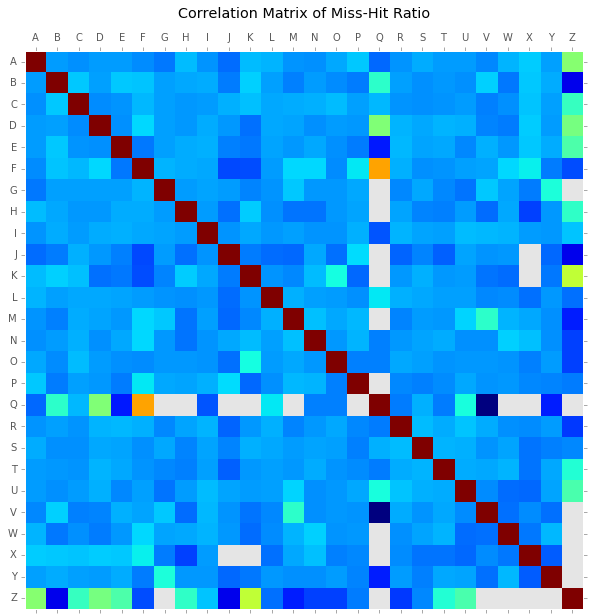

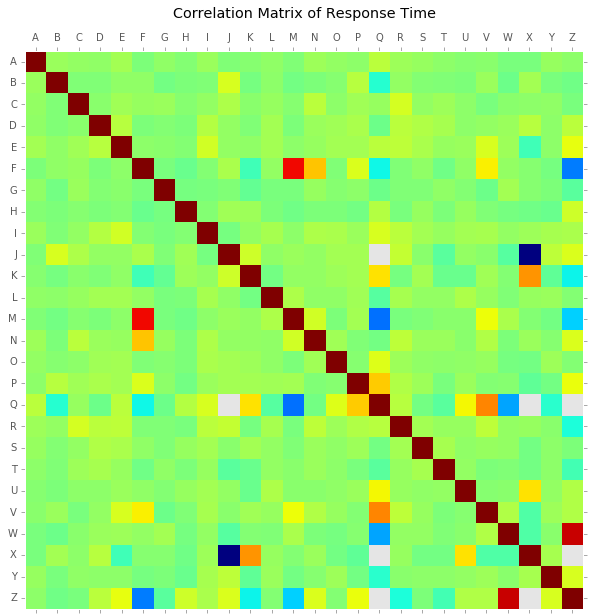

In [89]:
hm_corr = plot_corr(hm_matrix, size=10)
hm_corr.title(r'Correlation Matrix of Miss-Hit Ratio')

speed_corr = plot_corr(speed_matrix, size=10)
speed_corr.title(r'Correlation Matrix of Response Time')

In [ ]:
print speed_matrix.corr().max()